# Practical Exam: Sample SQL Associate

Tech Solutions Inc. is a leading technology company specializing in software development and IT consulting services. The company prides itself on delivering innovative solutions to clients across various industries. With a dedicated team of skilled professionals, TechSolutions has earned a reputation for excellence in the tech industry.

Tech Solutions Inc. has been experiencing a decline in customer satisfaction ratings over the past few months. Customer feedback surveys and support tickets indicate an increase in dissatisfaction among clients. The company is concerned about this trend as it directly impacts customer retention, reputation, and overall business growth.

You are working with the customer support team to provide data to managers to help the company take proactive measures to address these concerns effectively.

## Data

The following schema diagram shows the tables available.


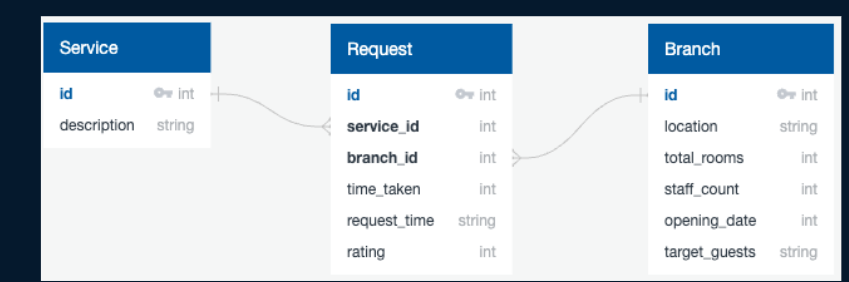

# Task 1

Before you can start any analysis, you need to confirm that the data is accurate and reflects what you expect to see.

It is known that there are some issues with the `support` table, and the data team have provided the following data description.

Write a query to return data matching this description. You must match all column names and description criteria.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|id | Discrete. The unique identifier of the support ticket. </br>Missing values are not possible due to the database structure.|
| customer_id | Discrete. The unique identifier of the customer. </br>Missing values should be replaced with 0.|
| category | Nominal. The gategory of the support request, can be one of Feedback, Billing Enquiry, Bug, Installation Problem, Other. </br>Missing values should be replaced with Other. |
| status | Nominal. The current status of the support ticket, one of Open, In Progress or Resolved. </br>Missing values should be replaced with 'Resolved'. |
| creation_date | Discrete. The date the ticket was created. Can be any date in 2023. </br>Missing values should be replaced with 2023-01-01. |
| response_time | Discrete. The number of days taken to respond to the support ticket. </br>Missing values should be replaced with 0. |
| resolution_time | Continuos. The number of hours taken to resolve the support ticket, rounded to 2 decimal places. </br>Missing values should be replaced with 0. |

In [ ]:
-- Write your query for task 1 in this cell
select
	id,
	coalesce(customer_id, 0) as customer_id,
	coalesce(category, 'Other') as category,
	coalesce(status, 'Resolved') as status,
	coalesce(creation_date, '2023-01-01') as creation_date,
	coalesce(response_time ,0) as response_time,
	coalesce(round
			 (substring(resolution_time
			  from 1
			  for strpos(resolution_time,' ')-1
			  )::numeric,2),
			 0) as resolution_time
from support

,id,customer_id,category,status,creation_date,response_time,resolution_time
0,1,1062,Installation Problem,In Progress,2023-01-26 00:00:00+00:00,6,0.00
1,2,892,Billing enquiry,Open,2023-06-18 00:00:00+00:00,3,0.00
2,3,433,Feedback,Open,2023-08-17 00:00:00+00:00,1,0.00
3,6,764,Billing enquiry,Open,2023-01-16 00:00:00+00:00,3,0.00
4,7,1144,Billing enquiry,Open,2023-06-01 00:00:00+00:00,2,0.00
...,...,...,...,...,...,...,...
1982,2995,1091,Billing enquiry,-,2023-10-01 00:00:00+00:00,3,3.93
1983,2996,1024,Bug,In Progress,2023-07-31 00:00:00+00:00,1,0.00
1984,2997,1105,Installation Problem,In Progress,2023-02-06 00:00:00+00:00,5,0.00
1985,2998,1608,Bug,In Progress,2023-06-10 00:00:00+00:00,3,0.00


# Task 2

It is suspected that the response time to tickets is a big factor in unhappiness.

Calculate the minimum and maximum response time for each category of support ticket.

Your output should include the columns `category`, `min_response` and `max_response`.

Values should be rounded to two decimal places where appropriate.

In [ ]:
-- Write your query for task 2 in this cell
select
	category,
	min(response_time) as min_response,
	max(response_time) as max_response
from support
group by category

,category,min_response,max_response
0,Other,1,5
1,Bug,1,13
2,Feedback,1,2
3,Billing enquiry,2,8
4,Installation Problem,5,17


# Task 3

The support team want to know more about the `rating` provided by customers who also reported `Bugs` or `Installation Problem`s.

Write a query to return the `rating` from the survey, the `customer_id`, `category` and `response_time` of the support ticket, for the customers & categories of interest.

Use the original support table, not the output of task 1.

In [ ]:
-- Write your query for task 3 in this cell
select
	survey.rating,
	support.customer_id,
	support.category,
	support.response_time
from support
Left join survey
on support.id = survey.id
--and support.customer_id = survey.customer_id
where support.category in ('Bug','Installation Problem')
	  --and rating is not Null

,rating,customer_id,category,response_time
0,3.0,1062,Installation Problem,6
1,5.0,1495,Bug,1
2,2.0,1090,Bug,3
3,4.0,1207,Bug,2
4,4.0,1256,Bug,3
...,...,...,...,...
776,NaN,1459,Installation Problem,5
777,NaN,1024,Bug,1
778,NaN,1105,Installation Problem,5
779,NaN,1608,Bug,3
